In [3]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from sklearn.externals import joblib

Using TensorFlow backend.


In [4]:
# X_train = []
# y_train = []
# X_test = []
# y_test = []

# count=0
# yourpath = '../imagenes-vacia/'
# for root, dirs, files in os.walk(yourpath, topdown=False):
#     for name in files:
#         if count%100==0:
#             print(name[:-4],end=", ")
        
#         if count%50==0:
#             imagen = cv2.imread(yourpath+name)
#             X_test.append(imagen)
#             y_test.append('vacia')
#         elif count%5==0:
#             imagen = cv2.imread(yourpath+name)
#             X_train.append(imagen)
#             y_train.append('vacia')
#         count += 1

# yourpath = '../imagenes-congestionada/'
# for root, dirs, files in os.walk(yourpath, topdown=False):
#     for name in files:
#         if count%100==0:
#             print(name[:-4],end=", ")
#         if count%50==0:
#             imagen = cv2.imread(yourpath+name)
#             X_test.append(imagen)
#             y_test.append('congestionada')
#         elif count%5==0:
#             imagen = cv2.imread(yourpath+name)
#             X_train.append(imagen)
#             y_train.append('congestionada')
#         count += 1

# yourpath = '../imagenes-atascada/'
# for root, dirs, files in os.walk(yourpath, topdown=False):
#     for name in files:
#         if count%100==0:
#             print("a"+name[1:-4],end=", ")
#         if count%5==0:
#             imagen = cv2.imread(yourpath+name)
#             X_test.append(imagen)
#             y_test.append('atascada')
#         elif count%5==0:
#             imagen = cv2.imread(yourpath+name)
#             X_train.append(imagen)
#             y_train.append('atascada')
#         count += 1

frameRed0, frameRed1088, frameRed1178, frameRed1268, frameRed1358, frameRed1448, frameRed1538, frameRed1628, frameRed1718, frameRed1808, frameRed1899, frameRed1989, frameRed2078, frameRed2168, frameRed2258, frameRed2348, frameRed2438, frameRed2528, frameRed2618, frameRed2708, frameRed2799, frameRed2889, frameRed2979, frameRed3068, frameRed3158, frameRed3248, frameRed3338, frameRed3428, frameRed3518, frameRed3608, frameRed3699, frameRed3789, frameRed3879, frameRed3969, frameRed4058, frameRed4148, frameRed4238, frameRed4328, frameRed4418, frameRed4508, frameRed4599, frameRed4689, frameRed4779, frameRed4869, frameRed4959, frameRed5048, frameRed5138, frameRed5228, frameRed5318, frameRed5408, frameRed5499, frameRed5589, frameRed5679, frameRed5769, frameRed5859, frameRed5949, frameRed6038, frameRed651, frameRed741, frameRed831, frameRed921, cRed_frame0113, cRed_frame0213, cRed_frame0313, cRed_frame0413, cRed_frame0513, cRed_frame0613, cRed_frame0713, cRed_frame0813, cRed_frame0913, cRed_fram

In [5]:
# filename='D:\modelos\RX_train.sav'
# joblib.dump(X_train,filename)
# filename='D:\modelos\RX_test.sav'
# joblib.dump(X_test,filename)
# filename='D:\modelos\Ry_train.sav'
# joblib.dump(y_train,filename)
# filename='D:\modelos\Ry_test.sav'
# joblib.dump(y_test,filename)

['D:\\modelos\\Ry_test.sav']

In [4]:
sav_X_train = "D:\modelos\RX_train.sav"
X_train = joblib.load(sav_X_train)
sav_y_train = "D:\modelos\Ry_train.sav"
y_train = joblib.load(sav_y_train)
sav_X_test = "D:\modelos\RX_test.sav"
X_test = joblib.load(sav_X_test)
sav_y_test = "D:\modelos\Ry_test.sav"
y_test = joblib.load(sav_y_test)

Longitud del conjunto de fotos de train:  3033
Longitud del conjunto de fotos de test:    1229
Tamaño de cada imagen: 			    506 x 900


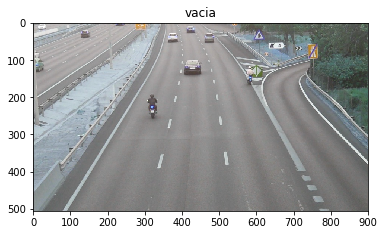

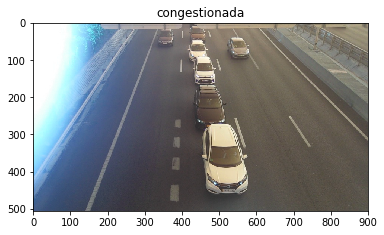

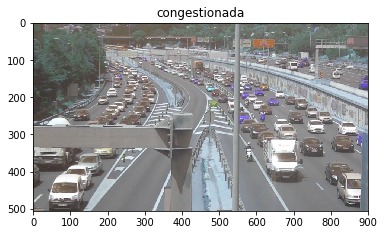

In [13]:
import matplotlib.pyplot as ply
print('Longitud del conjunto de fotos de train: ',len(X_train))
print('Longitud del conjunto de fotos de test:   ',len(X_test))
print('Tamaño de cada imagen: \t\t\t   ',X_train[0].shape[0],'x',X_train[0].shape[1])

ply.imshow(X_train[10])
ply.title(y_train[10])
ply.show()
ply.imshow(X_train[1611])
ply.title(y_train[1611])
ply.show()
ply.imshow(X_train[2900])
ply.title(y_train[2900])
ply.show()


In [14]:
X_train = np.array(X_train).reshape(len(X_train), 3, 506, 900).astype('float32')
X_test = np.array(X_test).reshape(len(X_test), 3, 506, 900).astype('float32')

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
s = pd.Series(["vacia","congestionada","atascada"], dtype="category")

In [17]:
y_train_c = np.array(pd.Categorical(y_train, categories=s,
                                    ordered=False))
y_test_c = np.array(pd.Categorical(y_test, categories=s,
                                    ordered=False))

In [18]:
num_classes = s.shape[0]
num_classes

3

In [19]:
X_train.shape

(3033, 3, 506, 900)

In [21]:
# Definimos el modelo
num_classes=3
def gen_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(3033,3,506,900), activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilamos el modelo
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# # Construimos el modelo
model = gen_model()

ValueError: Input 0 is incompatible with layer conv2d_2: expected ndim=4, found ndim=5

In [ ]:
model.fit(np.array(X_train), np.array(y_train), batch_size=32, epochs=100)

In [ ]:
score = model.evaluate(np.array(X_test), np.array(y_test), batch_size=32)

In [ ]:
X_train[0].shape